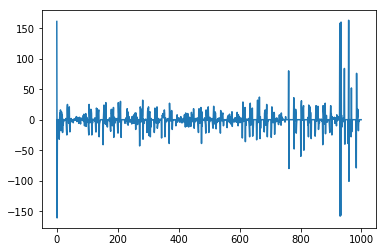

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('hourly_data.csv',index_col = ['date_time'], parse_dates = ['date_time'])
df = df[:1000]
X_new = df['X']

x_list = list(df['X'])
def diff_i(diff, order):
    diff_prev = list(diff)
    diff_next = list()
    for i in range(order):
        diff_next = [diff_prev[0]]
        diff_next.extend([(diff_prev[i] - diff_prev[i-1]) for i in range(1, len(diff_prev))])
        diff_prev = list(diff_next)
    return diff_next

X = diff_i(x_list,2)
plt.plot(X)
plt.show()

                      0
date_time              
2017-09-21 09:00:00 -10
2017-09-21 10:00:00   0
2017-09-21 11:00:00   0
2017-09-21 12:00:00   0
2017-09-21 13:00:00   0


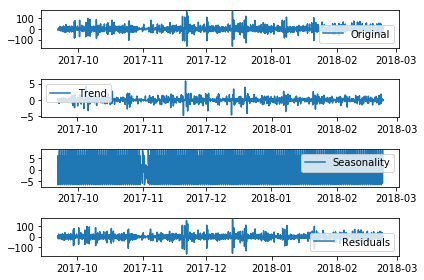

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
stationary = pd.read_csv('diff_order2.csv', index_col=['date_time'], parse_dates= ['date_time'])
print(stationary.head())

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(stationary, freq=24)


trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(stationary, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [43]:
#use AIC-  The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data 
# to check which value of pdq PDQ are suitable for ARIMA
from pyramid.arima import auto_arima
stepwise_model = auto_arima(X_new, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, stationary=False)

print(stepwise_model.aic())


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=7964.072, BIC=7988.545, Fit time=1.819 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=9105.701, BIC=9115.491, Fit time=0.064 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=8117.020, BIC=8136.598, Fit time=1.133 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=8019.294, BIC=8038.873, Fit time=1.880 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=7870.351, BIC=7899.719, Fit time=2.852 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=8115.812, BIC=8140.285, Fit time=1.431 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=7770.878, BIC=7805.141, Fit time=6.828 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=7778.311, BIC=7807.679, Fit time=5.865 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=7751.819, BIC=7790.976, Fit time=8.196 seconds
Fit ARIMA: order=(2, 1, 0) s

In [44]:

train = X_new[:-100]
test = X_new[-100:]
stepwise_model.fit(train)

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.

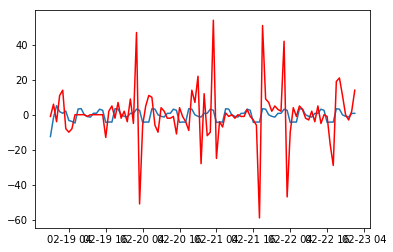

In [11]:
future_predicts = stepwise_model.predict(n_periods=100)
# print(future_predicts)
future_forecast = pd.DataFrame(future_predicts,index = test.index,columns=['Prediction'])
plt.plot(future_forecast, label='predictions')
plt.plot(test, color='red', label='observed')

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test, future_forecast))
print(rms)

15.230317910645189


In [17]:
int_0 = list(future_forecast.get('Prediction').values)
order = 2
int_next = list()
for i in range(order):
    int_next = list(int_0)
    for j in range(1, len(int_next)):
        int_next[j] += int_next[j-1]

print(int_0)
print(int_next)

[-12.473822145756749, -1.6741984778242198, 5.1352916397482735, 1.7473259073341971, 0.82287176939146001, 2.0550549735727759, -3.2934130974841009, -3.8598546797179765, -4.7591892899987549, 3.2600693641958571, 3.4653931744620987, 0.049411274485116508, -1.0329763004352017, -1.3803017604380052, 0.82938954257232211, 0.83528361528977779, 3.1416297664558908, 2.5070700595077562, -4.3802319044595652, -4.1556267403157898, -4.2329450722531199, 3.4225797697132689, 3.2096471736999228, -0.04780205158182238, -0.91547919732925476, -1.331590912301875, 0.76901393001922269, 0.80380888513683302, 3.1653946725533753, 2.5190843832092464, -4.3960439048785842, -4.1669180363286529, -4.2302844033506046, 3.42364568386088, 3.2037450598352941, -0.053239488009194105, -0.91745577956108282, -1.333640620758439, 0.76524854060173764, 0.7999980473585413, 3.162426590949972, 2.5161748116610982, -4.3993697894035817, -4.1702946534902345, -4.2334603858347499, 3.4205012992880994, 3.2005003278614286, -0.056507130994254105, -0.920